# Importing libraries

In [38]:
import pandas as pd
import re
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as rm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Exploration

In [2]:
data = pd.read_csv("linkedin.csv")
data.head(3)

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."


In [3]:
# Extracting useful data

data = data[['description','category']]
data.head(3)

,description,category
0,"An experienced HR professional, HR mentor and...",HR
1,"Head Talent Acquisition, HR Leader and Strateg...",HR
2,A Talent Acquisition and HR professional with ...,HR


In [4]:
# checking null values in the dataset
data.isna().sum()

description    581
category         0
dtype: int64

In [5]:
# removing the null values in the dataset
data1 = data.dropna()

In [6]:
# finding total no. of categories
len(data1.category.unique())

25

In [7]:
# taking a look at the dataset
data1.head(3)

,description,category
0,"An experienced HR professional, HR mentor and...",HR
1,"Head Talent Acquisition, HR Leader and Strateg...",HR
2,A Talent Acquisition and HR professional with ...,HR


In [8]:
# checking null values again
data1.isna().sum()

description    0
category       0
dtype: int64

In [9]:
# checking total no. of instances in the dataset
len(data1)

670

In [10]:
# checking frequency of each category in the data
data1.category.value_counts()

Public Relations           41
Health & Fitness           40
Digital Media              38
Business Development       36
Consultant                 36
Engineering                36
Sales                      35
HR                         34
Food & Beverages           28
Information Technology     28
Accountant                 27
Banking                    26
Advocate                   25
Building & Construction    25
Education                  24
Designing                  23
Aviation                   23
Agricultural               22
Finance                    21
Arts                       20
Apparel                    19
Architects                 19
Managment                  17
Automobile                 14
BPO                        13
Name: category, dtype: int64

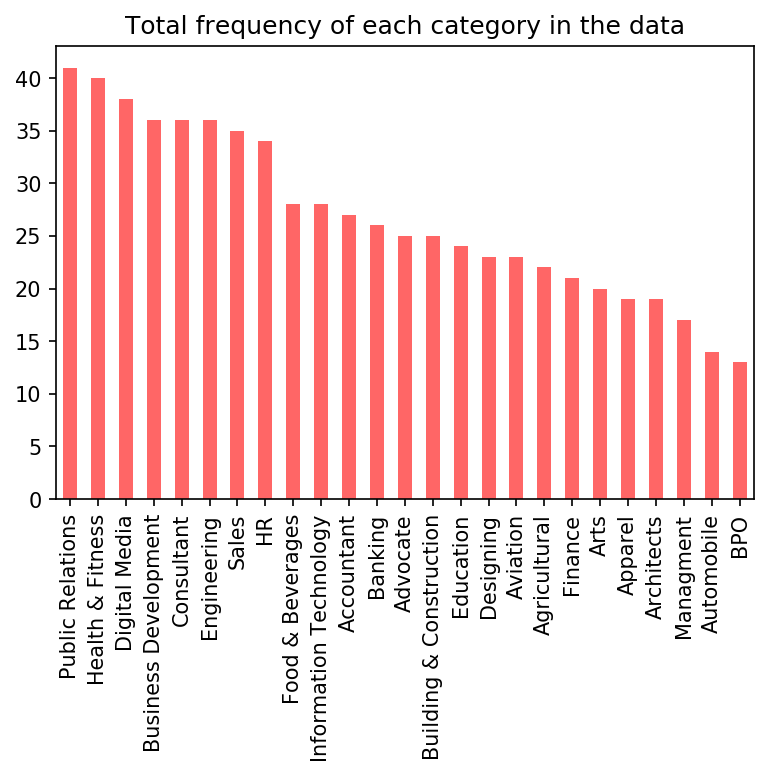

In [11]:
# plotting frequencies of job categories
plt.figure(dpi=150)
data1.category.value_counts().plot(kind = 'bar', color = 'red', alpha = 0.6)
plt.title('Total frequency of each category in the data')
plt.show()

In [12]:
# helper function to clean the text in the data
def preprocess_text(text):
    text.lower()
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from text
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_words).lower()

In [13]:
# having a look at the first job description
data1['description'][0]

'An experienced HR professional,  HR mentor and Coach , Talent advisory and HR strategist... see more'

In [15]:
stop_words = stopwords.words('english')

In [16]:
# after applying cleaning
preprocess_text(data1['description'][0])

'an experienced hr professional hr mentor coach talent advisory hr strategist see'

In [17]:
# making a new column of clean text
data1['perprocessed'] = data1['description'].apply(preprocess_text)
data1.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,description,category,perprocessed
0,"An experienced HR professional, HR mentor and...",HR,an experienced hr professional hr mentor coach...
1,"Head Talent Acquisition, HR Leader and Strateg...",HR,head talent acquisition hr leader strategic pa...
2,A Talent Acquisition and HR professional with ...,HR,a talent acquisition hr professional experienc...


In [18]:
def lower_text(text):
    return text.lower()

In [19]:
data1['category'][0]

'HR'

In [20]:
lower_text(data1['category'][0])

'hr'

In [21]:
# converting uppercase to lowercase of job category 
data1['job_category'] = data1['category'].apply(lower_text)
data1 = data1[['perprocessed','job_category']]
data1.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,perprocessed,job_category
0,an experienced hr professional hr mentor coach...,hr
1,head talent acquisition hr leader strategic pa...,hr
2,a talent acquisition hr professional experienc...,hr


In [22]:
# saving cleaned data to csv
data1.to_csv('preprocessed_data.csv',index=False)

# importing cleaned csv

In [23]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

,perprocessed,job_category
0,an experienced hr professional hr mentor coach...,hr
1,head talent acquisition hr leader strategic pa...,hr
2,a talent acquisition hr professional experienc...,hr
3,over 18 years experience it ites bpo leading g...,hr
4,human resources business partner demonstrated ...,hr


In [24]:
# creating encoded label of job_category in new column
df['category_id'] = df['job_category'].factorize()[0]
category_id_df = df[['job_category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'job_category']].values)
df.head()

,perprocessed,job_category,category_id
0,an experienced hr professional hr mentor coach...,hr,0
1,head talent acquisition hr leader strategic pa...,hr,0
2,a talent acquisition hr professional experienc...,hr,0
3,over 18 years experience it ites bpo leading g...,hr,0
4,human resources business partner demonstrated ...,hr,0


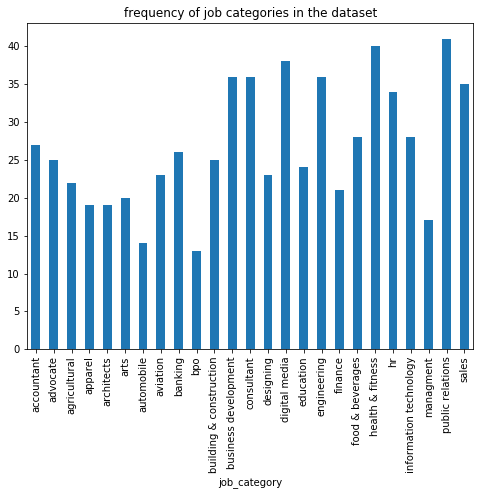

In [25]:
# plotting frequency of job categories in the dataset
fig = plt.figure(figsize=(8,6))
df.groupby('job_category').perprocessed.count().plot.bar(ylim=0)
plt.title('frequency of job categories in the dataset')
plt.show()

In [27]:
# making tfidf vector of the text in description column
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.perprocessed).toarray()
labels = df.category_id
features.shape

(670, 549)

    670 descriptions explained by 549 features 

# Applying ML

In [29]:
# findning out most common features of different categories
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for perprocessed, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(perprocessed))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'accountant':
  . Most correlated unigrams:
. accounting
. tax
  . Most correlated bigrams:
. professional graduated
. 11 years
# 'advocate':
  . Most correlated unigrams:
. laws
. legal
  . Most correlated bigrams:
. experience field
. real estate
# 'agricultural':
  . Most correlated unigrams:
. agriculture
. agricultural
  . Most correlated bigrams:
. 20 years
. experience field
# 'apparel':
  . Most correlated unigrams:
. textile
. apparel
  . Most correlated bigrams:
. team management
. customer service
# 'architects':
  . Most correlated unigrams:
. architects
. architecture
  . Most correlated bigrams:
. experience field
. currently working
# 'arts':
  . Most correlated unigrams:
. art
. arts
  . Most correlated bigrams:
. services industry
. project management
# 'automobile':
  . Most correlated unigrams:
. largest
. automobile
  . Most correlated bigrams:
. mechanical engineering
. vice president
# 'aviation':
  . Most correlated unigrams:
. ideas
. aviation
  . Most correla

In [31]:
# creating wrd vector and model for prediction
X_train, X_test, y_train, y_test = train_test_split(df['perprocessed'], df['job_category'], random_state = 0,stratify = df['job_category'],test_size=0.2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [32]:
# checking model prediction in data
print(clf.predict(count_vect.transform(["head talent acquisition hr leader strategic partner business leadership team areas people processand structure worked best it services product organizations see"])))

['hr']


In [34]:
df[df['perprocessed'] == "head talent acquisition hr leader strategic partner business leadership team areas people processand structure worked best it services product organizations see"]

,perprocessed,job_category,category_id
1,head talent acquisition hr leader strategic pa...,hr,0


In [36]:
# training accuracy of the model
print(accuracy_score(y_train,clf.predict(X_train_tfidf)))

0.8731343283582089


In [37]:
# testing accuracy of the model
print(accuracy_score(y_test,clf.predict(count_vect.transform(X_test))))

0.4552238805970149


C:\Users\dhank\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dhank\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dhank\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dhank\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

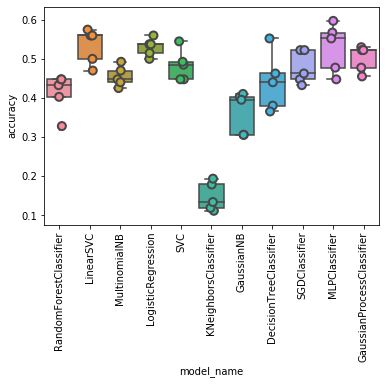

In [40]:
# testing some more models
CV = StratifiedKFold(n_splits=5)
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    SGDClassifier(),
    MLPClassifier(),
    GaussianProcessClassifier()
]
#CV = 5
cv_df = pd.DataFrame(index=range(5 * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV,)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=90)
plt.show()

In [41]:
# dataframe of model's testing accuracies
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.432836
1,RandomForestClassifier,1,0.447761
2,RandomForestClassifier,2,0.447761
3,RandomForestClassifier,3,0.328358
4,RandomForestClassifier,4,0.402985
5,LinearSVC,0,0.559701
6,LinearSVC,1,0.574627
7,LinearSVC,2,0.559701
8,LinearSVC,3,0.470149
9,LinearSVC,4,0.500000
